<a href="https://colab.research.google.com/github/utku-ozcan/Machine_Learning/blob/main/lab4.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

# **Exercise 1 - XOR problem**

In [1]:
from tensorflow.keras.models import Sequential
from tensorflow.keras.layers import Dense, InputLayer
import tensorflow as tf
import matplotlib.pyplot as plt

In [2]:
X = [[0, 0], [0, 1], [1, 0], [1, 1]]
y = [0, 1, 1, 0]

In [3]:
model = Sequential()
model.add(InputLayer(input_shape=(2)))
model.add(Dense(2, activation='sigmoid'))
model.add(Dense(1, activation='sigmoid'))

In [4]:
optimizer = tf.keras.optimizers.SGD(learning_rate=0.1)
model.compile(loss='binary_crossentropy', optimizer=optimizer, metrics=['accuracy'])

In [5]:
history = model.fit(X, y, epochs=2000, batch_size=1, verbose=0)

In [6]:
loss, accuracy = model.evaluate(X, y, verbose=0)
print('Accuracy: {:.2f}'.format(accuracy*100))

Accuracy: 100.00


In [7]:
for id_x, data_sample in enumerate(X):
  prediction = model.predict([data_sample])
  print(f"Data sample is {data_sample}, prediction from model {prediction}, ground_truth {y[id_x]}")

1/1 [==============================] - 0s 82ms/step
Data sample is [0, 0], prediction from model [[0.0359204]], ground_truth 0
1/1 [==============================] - 0s 29ms/step
Data sample is [0, 1], prediction from model [[0.9696255]], ground_truth 1
1/1 [==============================] - 0s 31ms/step
Data sample is [1, 0], prediction from model [[0.95026094]], ground_truth 1
1/1 [==============================] - 0s 31ms/step
Data sample is [1, 1], prediction from model [[0.02989375]], ground_truth 0


Text(0, 0.5, 'loss')

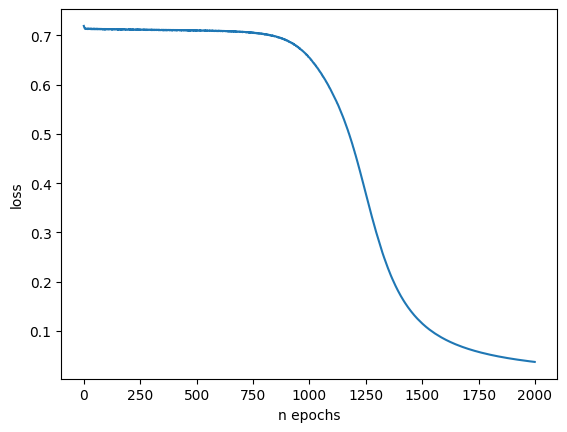

In [8]:
plt.figure()
plt.plot(history.history['loss'])
plt.xlabel('n epochs')
plt.ylabel('loss')

# **Exercise 2 - Congressional Voting Data**

In [9]:
import pandas as pd
import numpy as np
from tensorflow.keras.models import Sequential
from tensorflow.keras.layers import Dense
import tensorflow as tf
import matplotlib.pyplot as plt

In [10]:
path_to_dataset = '/content/drive/MyDrive/voting_complete.csv' # change the PATH
pd_dataset = pd.read_csv(path_to_dataset)

In [11]:
pd_dataset

,Unnamed: 0,Class Name,handicapped-infants,water-project-cost-sharing,adoption-of-the-budget-resolution,physician-fee-freeze,el-salvador-aid,religious-groups-in-schools,anti-satellite-test-ban,aid-to-nicaraguan-contras,mx-missile,immigration,synfuels-corporation-cutback,education-spending,superfund-right-to-sue,crime,duty-free-exports,export-administration-act-south-africa
0,0,republican,n,y,n,y,y,y,n,n,n,y,?,y,y,y,n,y
1,1,republican,n,y,n,y,y,y,n,n,n,n,n,y,y,y,n,?
2,2,democrat,?,y,y,?,y,y,n,n,n,n,y,n,y,y,n,n
3,3,democrat,n,y,y,n,?,y,n,n,n,n,y,n,y,n,n,y
4,4,democrat,y,y,y,n,y,y,n,n,n,n,y,?,y,y,y,y
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
430,430,republican,n,n,y,y,y,y,n,n,y,y,n,y,y,y,n,y
431,431,democrat,n,n,y,n,n,n,y,y,y,y,n,n,n,n,n,y
432,432,republican,n,?,n,y,y,y,n,n,n,n,y,y,y,y,n,y
433,433,republican,n,n,n,y,y,y,?,?,?,?,n,y,y,y,n,y


In [12]:
# define a function for train and test split

def train_test_split(pd_data: pd.DataFrame, test_ratio: float = 0.2) -> tuple:
    pd_dataset = pd_data.copy()
    pd_dataset = pd_dataset[pd_dataset.columns[1:]]
    index = np.arange(len(pd_dataset))
    index = np.random.permutation(index)
    train_ammount = int(len(index)*test_ratio)
    train_ids = index[train_ammount:]
    test_ids = index[:train_ammount]

    train_dataset = pd_dataset[pd_dataset.index.isin(train_ids)].reset_index()
    test_dataset = pd_dataset[pd_dataset.index.isin(test_ids)].reset_index()

    train_dataset = train_dataset[train_dataset.columns[1:]]
    test_dataset = test_dataset[test_dataset.columns[1:]]

    return train_dataset[train_dataset.columns[1:]], train_dataset[train_dataset.columns[0]], test_dataset[test_dataset.columns[1:]], test_dataset[test_dataset.columns[0]]

In [14]:
x_train, y_train, x_test, y_test = train_test_split(pd_dataset)

In [15]:
x_train

,handicapped-infants,water-project-cost-sharing,adoption-of-the-budget-resolution,physician-fee-freeze,el-salvador-aid,religious-groups-in-schools,anti-satellite-test-ban,aid-to-nicaraguan-contras,mx-missile,immigration,synfuels-corporation-cutback,education-spending,superfund-right-to-sue,crime,duty-free-exports,export-administration-act-south-africa
0,n,y,n,y,y,y,n,n,n,y,?,y,y,y,n,y
1,?,y,y,?,y,y,n,n,n,n,y,n,y,y,n,n
2,n,y,y,n,?,y,n,n,n,n,y,n,y,n,n,y
3,y,y,y,n,y,y,n,n,n,n,y,?,y,y,y,y
4,n,y,n,y,y,y,n,n,n,n,n,n,y,y,?,y
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
343,n,n,y,y,y,y,n,n,y,y,n,y,y,y,n,y
344,n,n,y,n,n,n,y,y,y,y,n,n,n,n,n,y
345,n,?,n,y,y,y,n,n,n,n,y,y,y,y,n,y
346,n,n,n,y,y,y,?,?,?,?,n,y,y,y,n,y


In [16]:

y_train = y_train.replace('republican', 1)
y_train = y_train.replace('democrat', 0)
x_train = x_train.replace('y',1)
x_train = x_train.replace('n',-1)
x_train = x_train.replace('?',0)



In [17]:
model1 = Sequential()
model1.add(InputLayer(input_shape=(16)))
model1.add(Dense(2, activation='sigmoid'))
model1.add(Dense(1, activation='sigmoid'))

In [18]:
model1.summary()

Model: "sequential_1"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 dense_2 (Dense)             (None, 2)                 34        
                                                                 
 dense_3 (Dense)             (None, 1)                 3         
                                                                 
Total params: 37 (148.00 Byte)
Trainable params: 37 (148.00 Byte)
Non-trainable params: 0 (0.00 Byte)
_________________________________________________________________


In [19]:
optimizer = tf.keras.optimizers.SGD(learning_rate=0.01)
model1.compile(loss='binary_crossentropy', optimizer=optimizer, metrics=['accuracy'])

In [20]:
y_test = y_test.replace('republican', 1)
y_test = y_test.replace('democrat', 0)

x_test = x_test.replace('y',1)
x_test = x_test.replace('n',-1)
x_test = x_test.replace('?',0)

In [21]:
history = model1.fit(x_train,y_train , epochs=1000, batch_size=2, verbose=1, validation_split=0.2)

Epoch 1/1000
139/139 [==============================] - 1s 6ms/step - loss: 0.7722 - accuracy: 0.3201 - val_loss: 0.7213 - val_accuracy: 0.4000
Epoch 2/1000
139/139 [==============================] - 0s 3ms/step - loss: 0.6722 - accuracy: 0.5971 - val_loss: 0.6600 - val_accuracy: 0.5714
Epoch 3/1000
139/139 [==============================] - 1s 4ms/step - loss: 0.6117 - accuracy: 0.6655 - val_loss: 0.6200 - val_accuracy: 0.6286
Epoch 4/1000
139/139 [==============================] - 0s 3ms/step - loss: 0.5623 - accuracy: 0.7230 - val_loss: 0.5865 - val_accuracy: 0.6857
Epoch 5/1000
139/139 [==============================] - 0s 3ms/step - loss: 0.5162 - accuracy: 0.8453 - val_loss: 0.5556 - val_accuracy: 0.8143
Epoch 6/1000
139/139 [==============================] - 1s 4ms/step - loss: 0.4728 - accuracy: 0.8993 - val_loss: 0.5277 - val_accuracy: 0.8000
Epoch 7/1000
139/139 [==============================] - 1s 4ms/step - loss: 0.4335 - accuracy: 0.9209 - val_loss: 0.5036 - val_accuracy:

In [22]:
loss, accuracy = model1.evaluate(x_test, y_test, verbose=0)
print('Accuracy: {:.2f}'.format(accuracy*100))
print('Loss: {:.2f}'.format(loss*100))

Accuracy: 95.40
Loss: 24.25


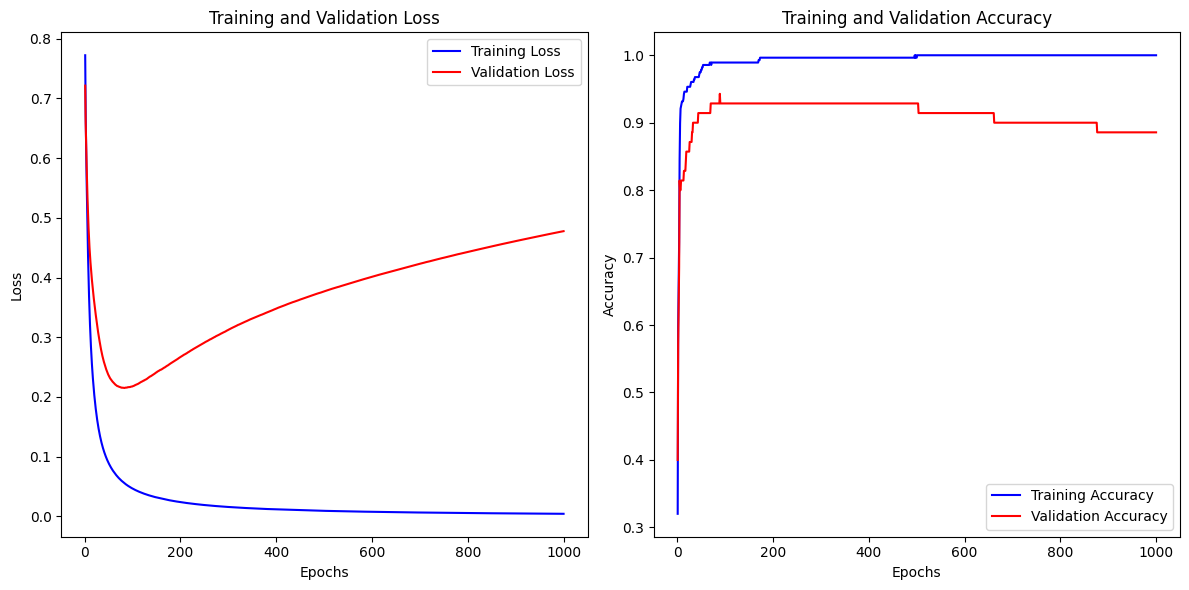

In [23]:
import matplotlib.pyplot as plt

# Extract loss and accuracy history from the training process
train_loss = history.history['loss']
val_loss = history.history['val_loss']
train_accuracy = history.history['accuracy']
val_accuracy = history.history['val_accuracy']
epochs = range(1, len(train_loss) + 1)

# Plot loss
plt.figure(figsize=(12, 6))
plt.subplot(1, 2, 1)
plt.plot(epochs, train_loss, 'b', label='Training Loss')
plt.plot(epochs, val_loss, 'r', label='Validation Loss')
plt.title('Training and Validation Loss')
plt.xlabel('Epochs')
plt.ylabel('Loss')
plt.legend()

# Plot accuracy
plt.subplot(1, 2, 2)
plt.plot(epochs, train_accuracy, 'b', label='Training Accuracy')
plt.plot(epochs, val_accuracy, 'r', label='Validation Accuracy')
plt.title('Training and Validation Accuracy')
plt.xlabel('Epochs')
plt.ylabel('Accuracy')
plt.legend()

plt.tight_layout()
plt.show()


